# 루브릭
|평가문항|상세기준|self check|
|:-------|:-------|:-----------------------|
|1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가?|3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다.|OK|
|2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가?|Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다.|OK|
|3. 딥러닝 모델을 활용해 성능이 비교 및 확인되었는가?|동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다.|OK|

### dataset
1. 케라스에서 제공하는 로이터 뉴스 데이터

### 적용할 알고리즘
1. Multinomial Native Bayes Classifier(나이브 베이즈 분류기)
2. CNB(Completement Naive Bayes Classifier)
3. Logistic Regression - Softmax Regression  
4. LinearSVC(Linear Support Vector Classifier)
5. Decision Tree 
6. Random Foreast
7. GradientBoostingClassifier
8. Voting

### 분류 성능 평가 지표  
1. Accuracy(정확도)
2. Confusion Matrix
3. Precision(정밀도)
4. Recall(재현율)
5. F1-score
6. ROC AUC

## 문제 정의  

> News category classification
> ML, DL 

## 분석 결과  
 **1. 손글씨 분류**
 * 성능평가 지표로써 Accuracy 선택  
  - label 클래스 값이 0 ~ 9 의 숫자를 예측하는 다중 분류이므로, 실제 데이터에서 예측 데이터가 얼마나 같은 지를 판단하는 지표인 Accuracy를 성능지료로 선택함   
  - 학습 데이터도 각 클래스마다 10% 비율로 동일하여, Accuracy를 성능지표로 선택
 
 
|Evaluation|DecisonTree|RandomForest|SVM|SGDClassifier|Logistic Regression|  
|:---------:|:----------:|:----------:|:--:|:----------:|:------------:|  
|Accuracy|87 %|98 %|99 %|96 %|97 %|
  
<hr/>

 **2. 와인 분류**
 * 성능평가 지표로써 Accuracy 선택
  - label 클래스 값이 0,1,2 중에서 와인의 등급을 예측하는 다중 분류이므로, 실제 데이터에서 예측 데이터가 얼마나 같은 지를 판단하는 지표인 Accuracy를 성능지료로 선택함   
  - 하지만, 학습 데이터는 각 클래스마다 비율 동일하지 않아, recall 도 같이 참조하면 좋을 꺼 같음
 
|Evaluation|DecisonTree|RandomForest|SVM|SGDClassifier|Logistic Regression|  
|:---------:|:----------:|:----------:|:--:|:----------:|:------------:|  
|Accuracy|94 %|94 %|64 %|53 %|92 %|

<hr/>  

 **3. 유방암 여부 예측**
 * 성능평가 지표로써 Positive(암인 경우)의 Recall 선택
  - 암이 양성일 경우(Malignant)는 Positive(1),  암이 음성일 경우(Benign) negative(0)으로 label 값을 할당  
  - 불균등한 label 클래스값을 가지는 이진 분류로 Positive 데이터 건수가 Negative에 비해서 적어서(40:60 비율), 많은 비율로 학습한 데이터로 예측하는 경향이 강함
  - 실제 Positive(암인경우)를 Negative(암이 아닌 경우)로 잘못 예측하면, 그 반대의 경우인 Negative(암이 아닌경우)를 Positive(암인경우)로 예측하는 경우보다 더  안좋은 영향이 발생  
  - Positive(암인 경우) 데이터의 예측 성능에 좀 더 초점을 맞춘 Recall를 성능 지표로 선택함
 
|Evaluation|DecisonTree|RandomForest|SVM|SGDClassifier|Logistic Regression|  
|:---------:|:----------:|:----------:|:--:|:----------:|:------------:|  
|Recall|93 %|88 %|76 %|88 %|95 %|

<hr/>
모델링 시에 data 전처리 및 hyper parameter 값 변경 없이 default 값으로 모델을 구현하였기에, 높은 점수가 나왔다고 해서 성능이 좋은 모델을 선정하기 어려움

## 분석환경

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Image
#Image(filename='test.jpg') 

In [3]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. 10,000 개 단어만 사용

## 로이터 뉴스 데이터 (1) 데이터 확인하기

### 훈련 데이터와 테스트 데이터 로드하기

* num_words = 10000 : 등장 빈도 횟수 1~10000 에 해당하는 단어만 사용 
* test_split = 0.2 : 80% 훈련 데이터, 20% 테스트 데이터로 사용

In [4]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [5]:
print('훈련 샘플의 수: {}'.format(len(X_train)))
print('테스트 샘플의 수: {}'.format(len(X_test)))
len(np.unique(y_train))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


46

In [6]:
max([max(news) for news in X_train])
max([max(news) for news in X_test])

9999

9999

In [7]:
dir(reuters)
len(reuters.get_word_index())
reuters.get_word_index()

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'get_word_index',
 'load_data']

30979

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [10]:
X_train[0]
X_test[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

[1,
 4,
 1378,
 2025,
 9,
 697,
 4622,
 111,
 8,
 25,
 109,
 29,
 3650,
 11,
 150,
 244,
 364,
 33,
 30,
 30,
 1398,
 333,
 6,
 2,
 159,
 9,
 1084,
 363,
 13,
 2,
 71,
 9,
 2,
 71,
 117,
 4,
 225,
 78,
 206,
 10,
 9,
 1214,
 8,
 4,
 270,
 5,
 2,
 7,
 748,
 48,
 9,
 2,
 7,
 207,
 1451,
 966,
 1864,
 793,
 97,
 133,
 336,
 7,
 4,
 493,
 98,
 273,
 104,
 284,
 25,
 39,
 338,
 22,
 905,
 220,
 3465,
 644,
 59,
 20,
 6,
 119,
 61,
 11,
 15,
 58,
 579,
 26,
 10,
 67,
 7,
 4,
 738,
 98,
 43,
 88,
 333,
 722,
 12,
 20,
 6,
 19,
 746,
 35,
 15,
 10,
 9,
 1214,
 855,
 129,
 783,
 21,
 4,
 2280,
 244,
 364,
 51,
 16,
 299,
 452,
 16,
 515,
 4,
 99,
 29,
 5,
 4,
 364,
 281,
 48,
 10,
 9,
 1214,
 23,
 644,
 47,
 20,
 324,
 27,
 56,
 2,
 2,
 5,
 192,
 510,
 17,
 12]

In [9]:
word_index = reuters.get_word_index()
index_word = dict([(value,key) for (key,value) in word_index.items()])
decoded_news1 = " ".join([index_word.get(i-3,"?") for i in X_train[0]])
decoded_news2 = " ".join([index_word.get(i-3,"?") for i in X_test[0]])
decoded_news1
decoded_news2

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

'? the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to ? growth and expansion plans for ? inc and ? inc over the next two years a and p said the acquisition of ? in august 1986 and ? in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt ? ? of west germany reuter 3'

In [13]:
y_train[0]
y_test[1]

3

10

### 데이터 분포 확인해보기

#### 뉴스 데이터 길이 분포

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


(array([2.292e+03, 2.917e+03, 1.098e+03, 8.240e+02, 4.880e+02, 3.410e+02,
        2.480e+02, 1.640e+02, 1.160e+02, 1.180e+02, 7.600e+01, 5.900e+01,
        6.400e+01, 4.300e+01, 4.700e+01, 2.800e+01, 2.500e+01, 1.500e+01,
        1.000e+01, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  13.  ,   60.26,  107.52,  154.78,  202.04,  249.3 ,  296.56,
         343.82,  391.08,  438.34,  485.6 ,  532.86,  580.12,  627.38,
         674.64,  721.9 ,  769.16,  816.42,  863.68,  910.94,  958.2 ,
        1005.46, 1052.72, 1099.98, 1147.24, 1194.5 , 1241.76, 1289.02,
        1336.28, 1383.54, 1430.8 , 1478.06, 1525.32, 1572.58, 1619.84,
        1667.1 , 1714

Text(0.5, 0, 'length of samples')

Text(0, 0.5, 'number of samples')

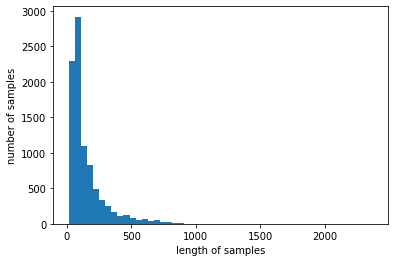

In [11]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in X_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#### 뉴스 카테고리 클래스 분포 확인

<AxesSubplot:ylabel='count'>

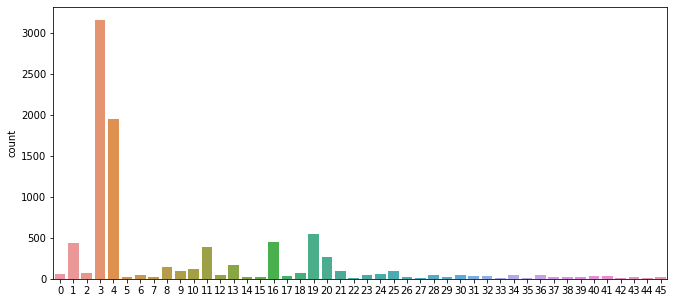

In [12]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [13]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


## 로이터 뉴스 데이터 (2) 데이터 복원하기

### 원본 뉴스 데이터로 복원해보기

In [34]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [35]:
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [71]:
word_index['the']
word_index['it']

1

13

In [36]:
# <pad>,<sos>,<unk>
index_to_word = { index+3 : word for word, index in word_index.items() }

In [37]:
#index_to_word[0]
index_to_word[4]
index_to_word[16]

'the'

'it'

In [38]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

#### index_to_word 로 텍스트 복원

In [40]:
' '.join([index_to_word[index] for index in x_train[0]])

'<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

####  index_to_word 로 텍스트 복원

In [41]:
' '.join([index_to_word[index] for index in [4, 587, 23, 133, 6, 30, 515]])

'the transaction is expected to be completed'

### OOV 문제와 UNK 토큰

* vocabulary : 기계가 알고 있는 단어들의 집합
* oov : 
* unknown : num_words=10000일 경우 이상이면 전부 '\<unk\>으로 로드됨 

In [42]:
decoded = []
for i in range(len(X_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

X_train = decoded
print(len(X_train))

8982


In [46]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in X_test[i]])
    decoded.append(t)

X_test = decoded
print(len(x_test))

2246


In [51]:
type(X_train), type(y_train)
X_train[:5]
X_test[:5]

(list, numpy.ndarray)

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

## 3. 벡터화 하기

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### DTM 생성

In [54]:
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(X_train)
print(X_train_dtm.shape)

(8982, 9670)


In [55]:
X_test_dtm = dtmvector.transform(X_test) #테스트 데이터를 DTM으로 변환
print(X_test_dtm.shape)

(2246, 9670)


### TF-IDF Matrix 생성

In [65]:
tfidf_transformer = TfidfTransformer()
tfidfv_train = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv_train.shape)
#tfidfv_train.toarray()

(8982, 9670)


array([0., 0., 0., ..., 0., 0., 0.])

In [57]:
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_test.shape)

(2246, 9670)


## 4. 다양한 머신러닝 모델 사용

### ML 모델의 라이브러리 불러오기 

In [94]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score


사용할 모델

나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅

In [61]:
# Classifier 객체 생성
mnb = MultinomialNB()
cnb = ComplementNB()
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
ct = DecisionTreeClassifier(max_depth=10, random_state=0)
rf = RandomForestClassifier(n_estimators=5, random_state=0)
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
vc = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft')

# 학습/예측/평기
mnb.fit(tfidfv_train, y_train)
mnb_predicted = mnb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, mnb_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, mnb_predicted, average='weighted')) #예측값과 실제값 비교

### 1) 나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)

In [101]:
# Multinomial Naive Bays Classifier 
mnb = MultinomialNB()

mnb.fit(tfidfv_train, y_train)
mnb_predicted = mnb.predict(tfidfv_test) #테스트 데이터에 대한 예측

print("정확도:", accuracy_score(y_test, mnb_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, mnb_predicted, average='weighted')) #예측값과 실제값 비교


MultinomialNB()

정확도: 0.6567230632235085
f1-score: 0.5764467518778252


In [78]:
x_test[3]
print()
y_test[3]

'<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

4

<BarContainer object of 46 artists>

(-1.0, 21.0)

([<matplotlib.axis.XTick at 0x7f7b38c67310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Probability')

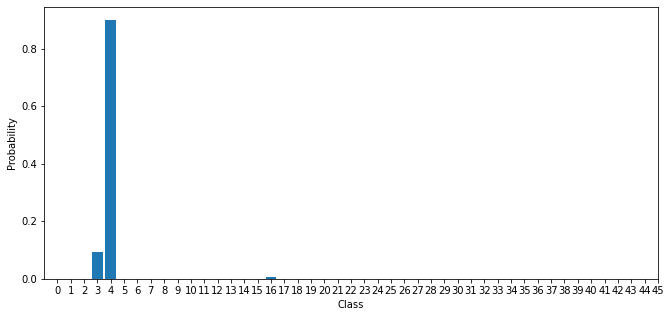

In [92]:
probability_3 = mnb.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(mnb.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(mnb.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [93]:
mnb.classes_
y_test[3]
np.argmax(mnb.predict_proba(tfidfv_test[3]))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

4

4

## 4-6. F1-Score, Confusion Matrix

In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Precision, Recall & F1 Score
* classification_report
  * macro : 단순평균
  * weighted : 각 클래스에 속하는 표본의 개수의 가중평균
  * accuracy : 정확도. 전체 학습 데이터의 개수에서 클래스를 정확하게 맞춘 개수의 비율

In [97]:
print(classification_report(y_test, mnb.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

### Confusion Matrix

In [105]:
print(confusion_matrix(y_test, mnb_predicted)[0:10,0:10])

[[  0   3   0   1   8   0   0   0   0   0]
 [  0  72   0   7  21   0   0   0   0   0]
 [  0   4   0   2  10   0   0   0   0   0]
 [  0   1   0 731  77   0   0   0   0   0]
 [  0   2   0  12 454   0   0   0   0   0]
 [  0   5   0   0   0   0   0   0   0   0]
 [  0   0   0   1  13   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0   0]
 [  0   0   0  23   9   0   0   0   0   0]
 [  0   4   0   0  18   0   0   0   0   2]]


In [99]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')


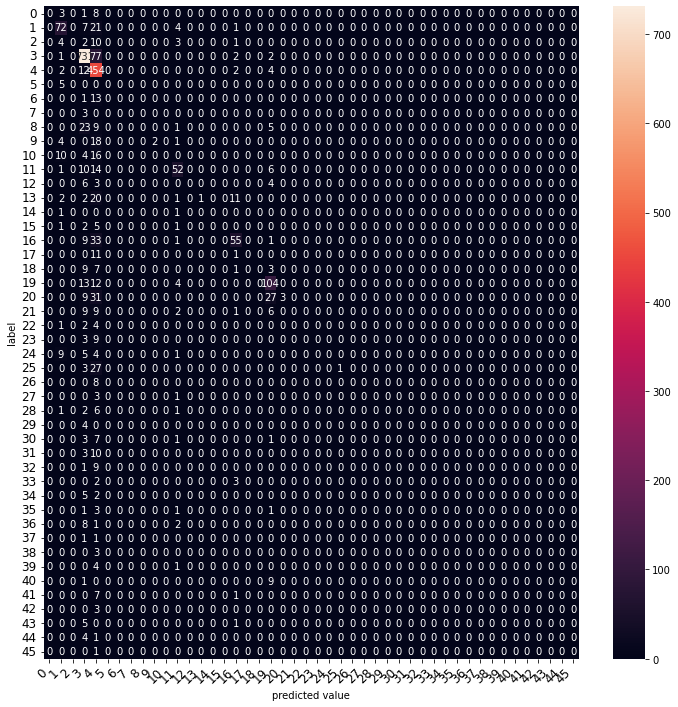

In [100]:
graph_confusion_matrix(mnb, tfidfv_test, y_test)

## 4-7. 다양한 머신러닝 모델 사용해보기 (1)

### 1) 나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)

In [108]:
# Multinomial Naive Bays Classifier 
mnb = MultinomialNB()

mnb.fit(tfidfv_train, y_train)
mnb_predicted = mnb.predict(tfidfv_test) #테스트 데이터에 대한 예측

print("정확도:", accuracy_score(y_test, mnb_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, mnb_predicted, average='weighted')) #예측값과 실제값 비교

MultinomialNB()

정확도: 0.6567230632235085
f1-score: 0.5764467518778252


### 2) Complement Naive Bayes Classifier(CNB)

In [107]:
# Complemnet Naive Bays Classifier(CNB) 
cnb = ComplementNB()
cnb.fit(tfidfv_train, y_train)

cnb_predicted = cnb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, cnb_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, cnb_predicted, average='weighted')) #예측값과 실제값 비교

ComplementNB()

정확도: 0.7707034728406055
f1-score: 0.7456682614453047


### 3) 로지스틱 회귀(Logistic Regression)

In [113]:
# Logistic Regression
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000, solver='liblinear')
lr.fit(tfidfv_train, y_train)

lr_predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, lr_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, lr_predicted, average='weighted')) #예측값과 실제값 비교

LogisticRegression(C=10000, max_iter=30000, solver='liblinear')

정확도: 0.8121104185218165
f1-score: 0.8071434296753882


### 4) 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [125]:
# Linear Support Vector Machine
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000000, dual=False)
lsvc.fit(tfidfv_train, y_train)

lsvc_predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, lsvc_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, lsvc_predicted, average='weighted')) #예측값과 실제값 비교

LinearSVC(C=1000, dual=False, max_iter=3000000, penalty='l1')

정확도: 0.7938557435440784
f1-score: 0.7899684726076251


### 5) 결정 트리(Decision Tree)

In [117]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=0)
dt.fit(tfidfv_train, y_train)

dt_predicted = dt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, dt_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, dt_predicted, average='weighted')) #예측값과 실제값 비교

DecisionTreeClassifier(max_depth=10, random_state=0)

정확도: 0.6202137132680321
f1-score: 0.5776398779280149


### 6) 랜덤 포레스트(Random Forest)

In [119]:
# Random Forest 
rc = RandomForestClassifier(n_estimators=5, random_state=0)
rc.fit(tfidfv_train, y_train)

rc_predicted = rc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, rc_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, rc_predicted, average='weighted')) #예측값과 실제값 비교

RandomForestClassifier(n_estimators=5, random_state=0)

정확도: 0.674087266251113
f1-score: 0.6429484177284822


### 7) 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [120]:
# GradientBoostingClassifier
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv_train, y_train)

grbt_predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, grbt_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, grbt_predicted, average='weighted')) #예측값과 실제값 비교

GradientBoostingClassifier(random_state=0)

정확도: 0.7662511130899377
f1-score: 0.7622247724249729


### 8) 보팅(Voting)

In [122]:
# VotingClassifier
vc = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2',solver='liblinear')),
        ('cnb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', verbose=3)
vc.fit(tfidfv_train, y_train)

vc_predicted = vc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, vc_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, vc_predicted, average='weighted')) #예측값과 실제값 비교

[Voting] ....................... (1 of 3) Processing lr, total=  11.3s
[Voting] ....................... (2 of 3) Processing cb, total=   0.0s
[Voting] ..................... (3 of 3) Processing grbt, total=14.2min


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10000, max_iter=3000,
                                                 solver='liblinear')),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 verbose=3, voting='soft')

정확도: 0.8165627782724845
f1-score: 0.8135328328742825


# 2. 2,0000 개 단어만 사용

## 로이터 뉴스 데이터 (1) 데이터 확인하기

### 훈련 데이터와 테스트 데이터 로드하기

* num_words = 10000 : 등장 빈도 횟수 1~10000 에 해당하는 단어만 사용 
* test_split = 0.2 : 80% 훈련 데이터, 20% 테스트 데이터로 사용

In [145]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=20000, test_split=0.2)

In [146]:
print('훈련 샘플의 수: {}'.format(len(X_train)))
print('테스트 샘플의 수: {}'.format(len(X_test)))
len(np.unique(y_train))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


46

In [147]:
max([max(news) for news in X_train])
max([max(news) for news in X_test])

19999

19996

In [149]:
X_train[0]
x_test[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

[1,
 4,
 1378,
 2025,
 9,
 697,
 4622,
 111,
 8,
 25,
 109,
 29,
 3650,
 11,
 150,
 244,
 364,
 33,
 30,
 30,
 1398,
 333,
 6,
 18292,
 159,
 9,
 1084,
 363,
 13,
 19231,
 71,
 9,
 16273,
 71,
 117,
 4,
 225,
 78,
 206,
 10,
 9,
 1214,
 8,
 4,
 270,
 5,
 16273,
 7,
 748,
 48,
 9,
 19231,
 7,
 207,
 1451,
 966,
 1864,
 793,
 97,
 133,
 336,
 7,
 4,
 493,
 98,
 273,
 104,
 284,
 25,
 39,
 338,
 22,
 905,
 220,
 3465,
 644,
 59,
 20,
 6,
 119,
 61,
 11,
 15,
 58,
 579,
 26,
 10,
 67,
 7,
 4,
 738,
 98,
 43,
 88,
 333,
 722,
 12,
 20,
 6,
 19,
 746,
 35,
 15,
 10,
 9,
 1214,
 855,
 129,
 783,
 21,
 4,
 2280,
 244,
 364,
 51,
 16,
 299,
 452,
 16,
 515,
 4,
 99,
 29,
 5,
 4,
 364,
 281,
 48,
 10,
 9,
 1214,
 23,
 644,
 47,
 20,
 324,
 27,
 56,
 2,
 2,
 5,
 192,
 510,
 17,
 12]

In [154]:
word_index = reuters.get_word_index()
index_word = dict([(value,key) for (key,value) in word_index.items()])
decoded_news1 = " ".join([index_word.get(i-3,"?") for i in X_train[0]])
decoded_news2 = " ".join([index_word.get(i-3,"?") for i in X_test[0]])
decoded_news1
decoded_news2

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

'? the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt ? ? of west germany reuter 3'

In [156]:
y_train[0]
y_test[1]

3

10

### 데이터 분포 확인해보기

#### 뉴스 데이터 길이 분포

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


(array([2.292e+03, 2.917e+03, 1.098e+03, 8.240e+02, 4.880e+02, 3.410e+02,
        2.480e+02, 1.640e+02, 1.160e+02, 1.180e+02, 7.600e+01, 5.900e+01,
        6.400e+01, 4.300e+01, 4.700e+01, 2.800e+01, 2.500e+01, 1.500e+01,
        1.000e+01, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  13.  ,   60.26,  107.52,  154.78,  202.04,  249.3 ,  296.56,
         343.82,  391.08,  438.34,  485.6 ,  532.86,  580.12,  627.38,
         674.64,  721.9 ,  769.16,  816.42,  863.68,  910.94,  958.2 ,
        1005.46, 1052.72, 1099.98, 1147.24, 1194.5 , 1241.76, 1289.02,
        1336.28, 1383.54, 1430.8 , 1478.06, 1525.32, 1572.58, 1619.84,
        1667.1 , 1714

Text(0.5, 0, 'length of samples')

Text(0, 0.5, 'number of samples')

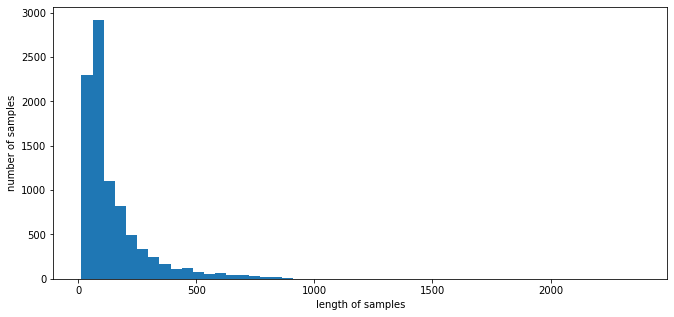

In [159]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in X_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#### 뉴스 카테고리 클래스 분포 확인

<AxesSubplot:ylabel='count'>

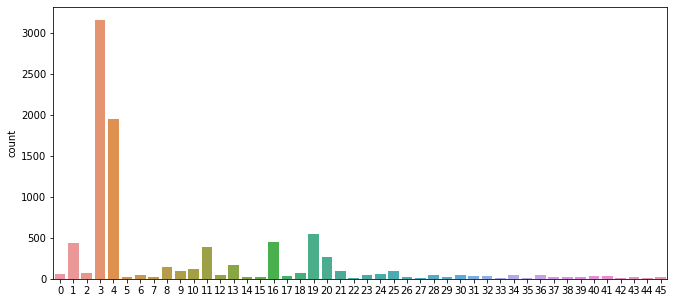

In [160]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [161]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


## 로이터 뉴스 데이터 (2) 데이터 복원하기

### 원본 뉴스 데이터로 복원해보기

In [163]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [164]:
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [166]:
word_index['the']
word_index['it']

1

13

In [167]:
# <pad>,<sos>,<unk>
index_to_word = { index+3 : word for word, index in word_index.items() }

In [169]:
#index_to_word[0]
index_to_word[4]
index_to_word[16]

'the'

'it'

In [171]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

#### index_to_word 로 텍스트 복원

In [173]:
' '.join([index_to_word[index] for index in x_train[0]])

'<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

####  index_to_word 로 텍스트 복원

In [175]:
' '.join([index_to_word[index] for index in [4, 587, 23, 133, 6, 30, 515]])

'the transaction is expected to be completed'

### OOV 문제와 UNK 토큰

* vocabulary : 기계가 알고 있는 단어들의 집합
* oov : 
* unknown : num_words=20000일 경우 이상이면 전부 '\<unk\>으로 로드됨 

In [177]:
decoded = []
for i in range(len(X_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

X_train = decoded
print(len(X_train))

8982


In [178]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in X_test[i]])
    decoded.append(t)

X_test = decoded
print(len(x_test))

2246


In [179]:
type(X_train), type(y_train)
X_train[:5]
X_test[:5]

(list, numpy.ndarray)

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two fo

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman <unk> yulo said yulo told reuters a survey d

## 3. 벡터화 하기

In [180]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### DTM 생성

In [181]:
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(X_train)
print(X_train_dtm.shape)

(8982, 18479)


In [182]:
X_test_dtm = dtmvector.transform(X_test) #테스트 데이터를 DTM으로 변환
print(X_test_dtm.shape)

(2246, 18479)


### TF-IDF Matrix 생성

In [183]:
tfidf_transformer = TfidfTransformer()
tfidfv_train = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv_train.shape)
#tfidfv_train.toarray()

(8982, 18479)


In [184]:
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_test.shape)

(2246, 18479)


## 4. 다양한 머신러닝 모델 사용

### ML 모델의 라이브러리 불러오기 

In [185]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score


### 1) 나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)

In [186]:
# Multinomial Naive Bays Classifier 
mnb = MultinomialNB()

mnb.fit(tfidfv_train, y_train)
mnb_predicted = mnb.predict(tfidfv_test) #테스트 데이터에 대한 예측

print("정확도:", accuracy_score(y_test, mnb_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, mnb_predicted, average='weighted')) #예측값과 실제값 비교



MultinomialNB()

정확도: 0.6193232413178985
f1-score: 0.5315181088041159


In [ ]:
### Complement Naive Bayes Classifier(CNB)

### 데이터 분포 확인해보기

## 2. Vocabulary sieze 변경

### 2-1 10,000 개 단어만 사용

In [ ]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

### 2-2 20,000 개 단어만 사용

In [ ]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=20000, test_split=0.2)

### 2-3 5,000 개 단어만 사용

In [ ]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)